In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import utils

In [2]:
pd.options.display.max_columns = None

### Data loading

In [3]:
dataset = pd.read_csv(os.path.join(utils.DATA_DIR, "horse.csv"))
dataset_test = pd.read_csv(os.path.join(utils.DATA_DIR, "horseTest.csv"))

print(dataset.shape)
dataset.head()

(299, 28)


,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


### Dividing attributes into categories - numerical, categorical, complex and identifying

In [4]:
complex_attrs = ['lesion_1', 'lesion_2', 'lesion_3']
id_attrs = ["hospital_number"]

numerical_attrs = []
categorical_attrs = []

for attr in dataset:
    if attr not in (*complex_attrs, *id_attrs):
        if dataset[attr].dtype in (int, float):
            numerical_attrs.append(attr)
        else:
            categorical_attrs.append(attr)

print(f"{'Complex attributes:':<25}{len(complex_attrs):>5}")
print(f"{'Identifying attributes: ':<25}{len(id_attrs):>5}")
print(f"{'Numerical attributes: ':<25}{len(numerical_attrs):>5}")
print(f"{'Categorical attributes: ':<25}{len(categorical_attrs):>5}")

assert len(dataset.columns.values) == len(complex_attrs) + len(id_attrs) + len(numerical_attrs) + len(categorical_attrs)

Complex attributes:          3
Identifying attributes:      1
Numerical attributes:        7
Categorical attributes:     17


### Examples

In [5]:
dataset.loc[[10, 30, 35]]

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
10,yes,adult,528548,38.1,66.0,12.0,cool,reduced,bright_red,less_3_sec,mild_pain,hypomotile,none,slight,none,3.0,increased,distend_large,44.0,6.0,cloudy,3.6,lived,yes,2124,0,0,yes
30,no,adult,529475,37.7,96.0,30.0,cool,reduced,pale_cyanotic,more_3_sec,extreme_pain,absent,severe,significant,less_1_liter,4.0,absent,distend_large,66.0,7.5,NaN,NaN,died,yes,4205,0,0,no
35,no,adult,528812,NaN,104.0,24.0,cold,reduced,pale_pink,more_3_sec,severe_pain,absent,moderate,NaN,more_1_liter,NaN,NaN,other,73.0,8.4,NaN,NaN,euthanized,yes,7111,0,0,no


### Values distribution

Decision attribute

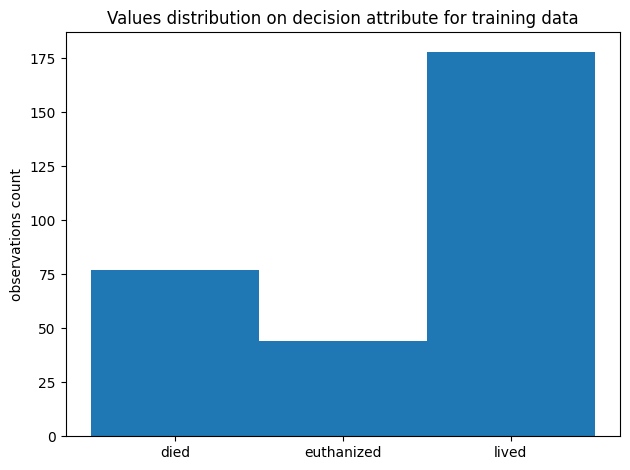

In [6]:
utils.plot_hist(
    data=dataset['outcome'],
    title="Values distribution on decision attribute for training data",
    ylabel="observations count",
    fig_title="distribution-decision-attr.png"
)

Continuous attributes

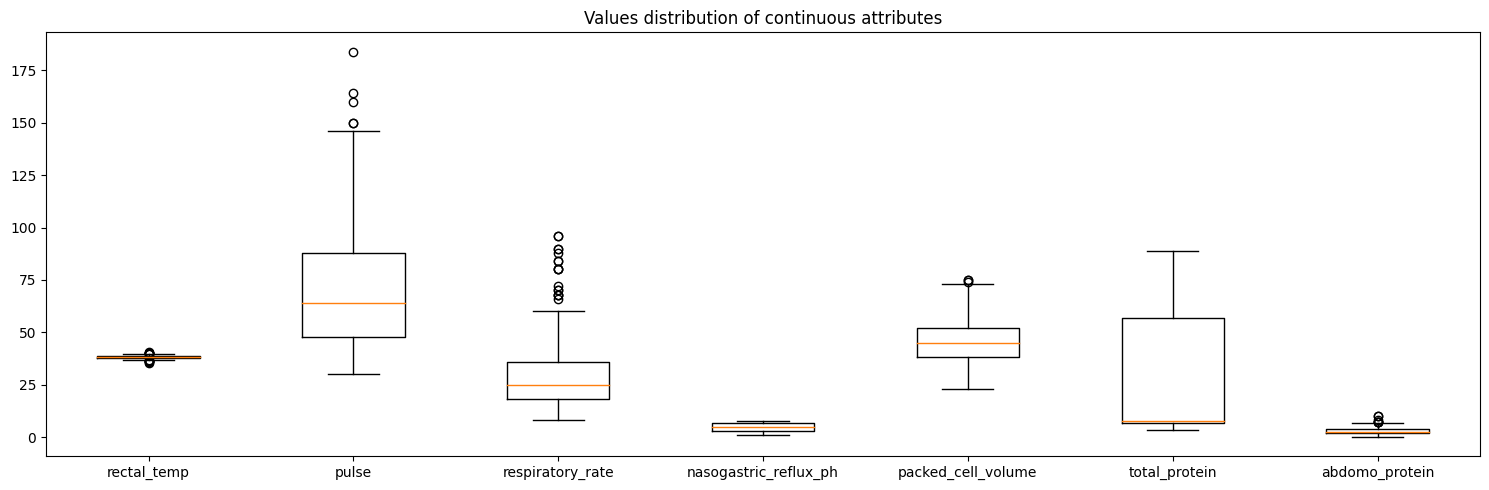

In [7]:
plt.figure(figsize=(15, 5))
filtered_vals = [
    dataset[attr][~np.isnan(dataset[attr])]
    for attr in numerical_attrs
]

plt.boxplot(filtered_vals, labels=numerical_attrs)
plt.title("Values distribution of continuous attributes")
plt.tight_layout()
plt.savefig(os.path.join(utils.PLOTS_DIR, "distribution-continuous-attrs.png"))
plt.show()

Outliers count on each numerical attribute

In [8]:
q1 = dataset[numerical_attrs].quantile(0.25)
q3 = dataset[numerical_attrs].quantile(0.75)
iqr = q3 - q1

lower_lim = q1 - 1.5 * iqr
upper_lim = q3 + 1.5 * iqr

dataset[numerical_attrs][(dataset[numerical_attrs] < lower_lim) | (dataset[numerical_attrs] > upper_lim)].count()

rectal_temp              14
pulse                     5
respiratory_rate         17
nasogastric_reflux_ph     0
packed_cell_volume        3
total_protein             0
abdomo_protein            7
dtype: int64

Categorical attributes

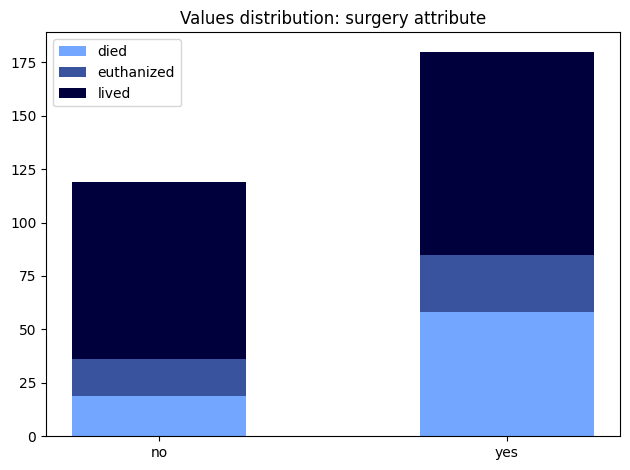

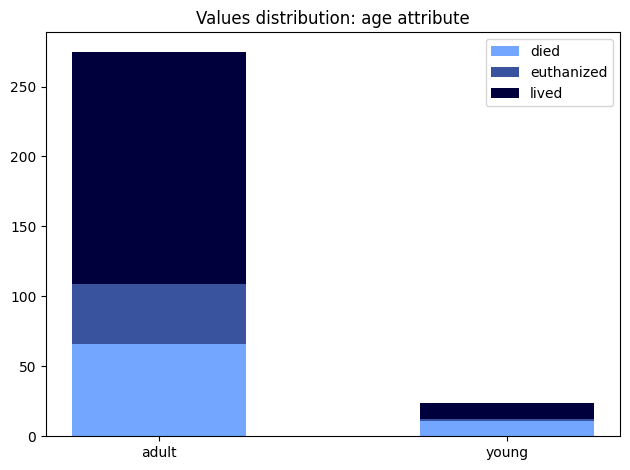

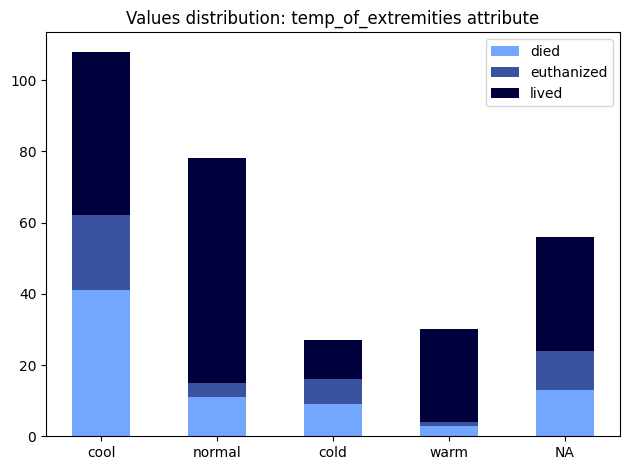

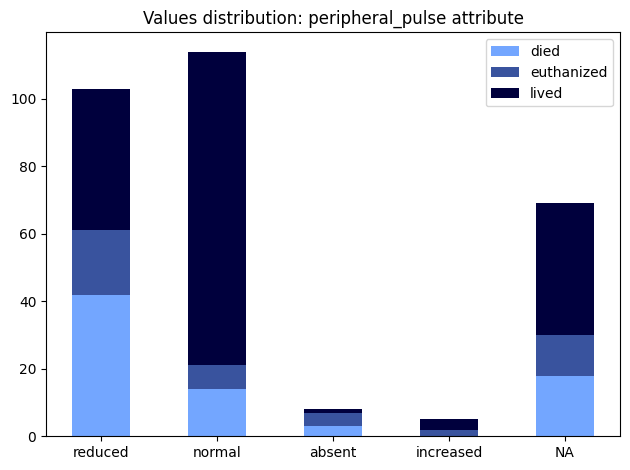

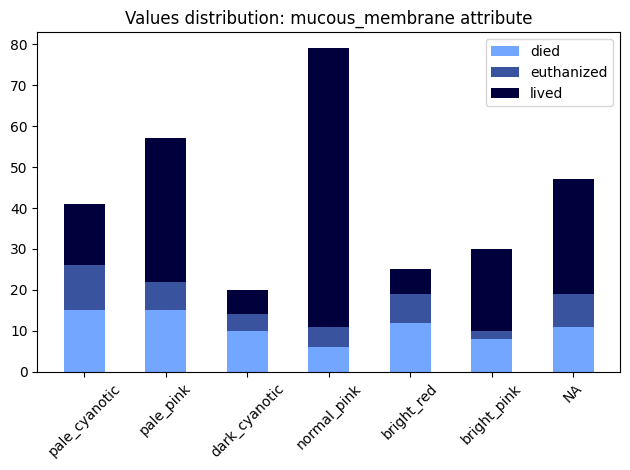

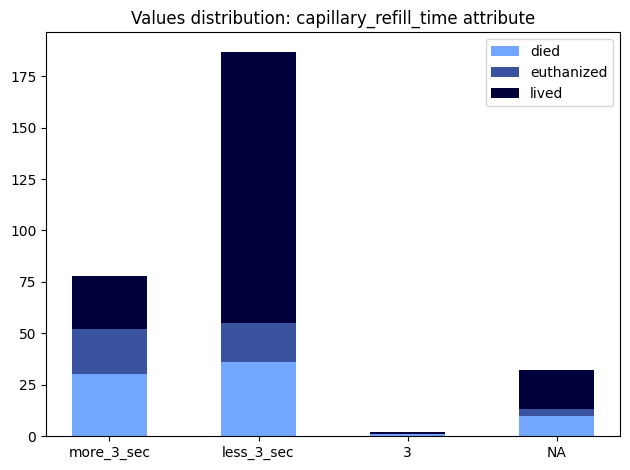

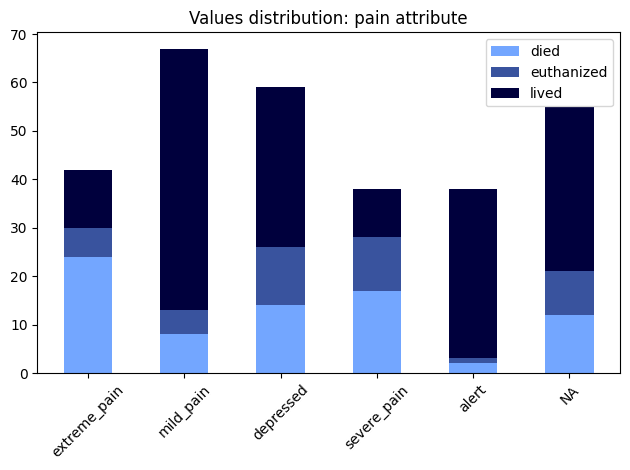

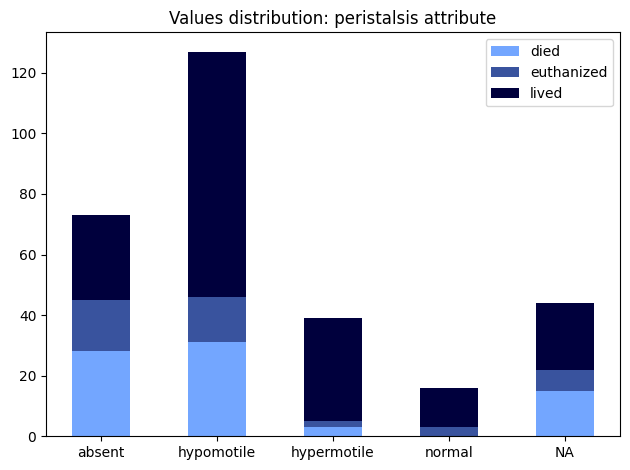

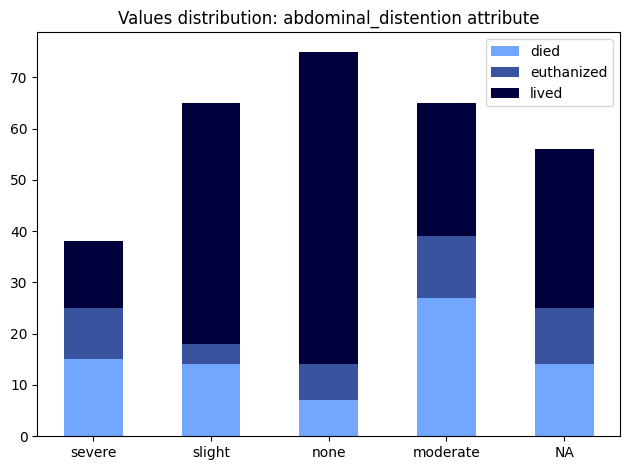

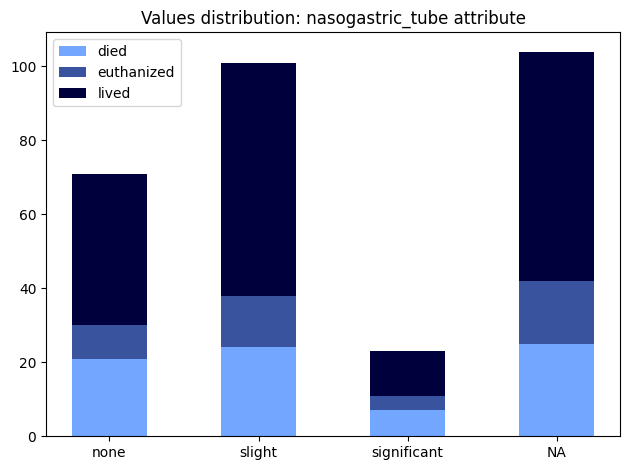

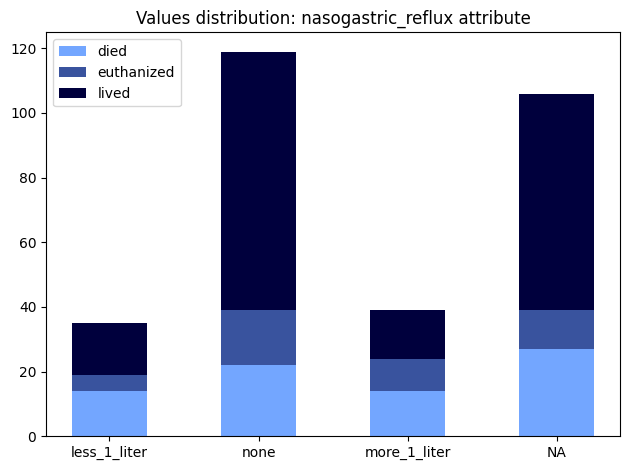

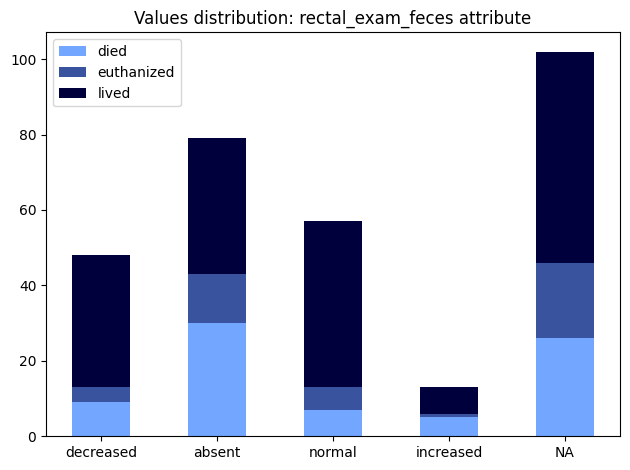

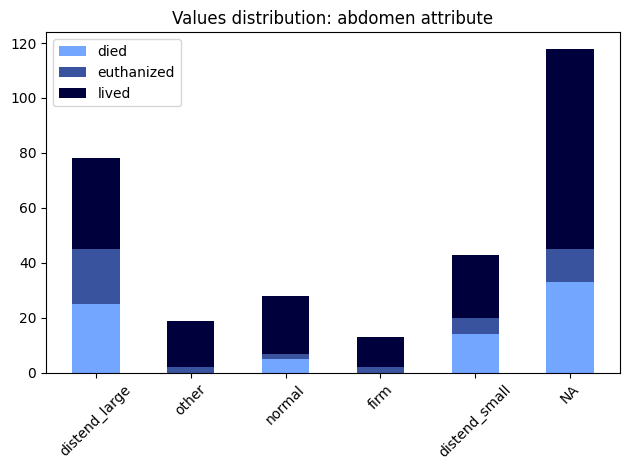

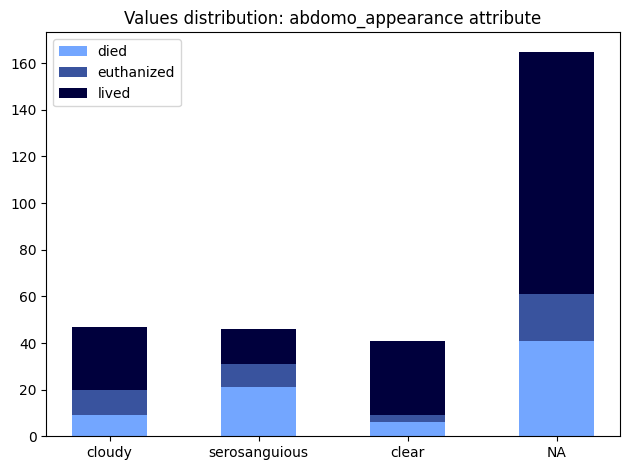

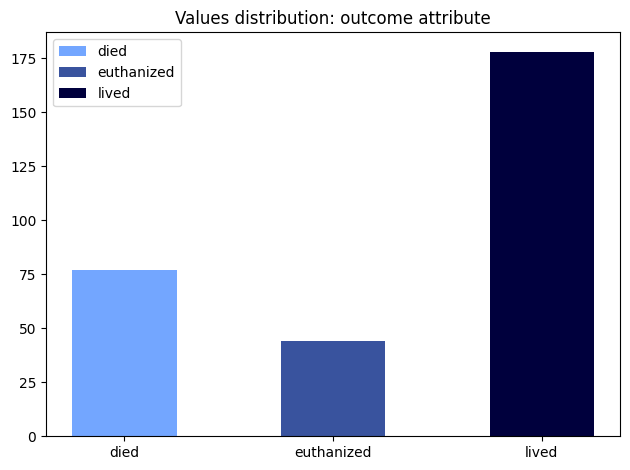

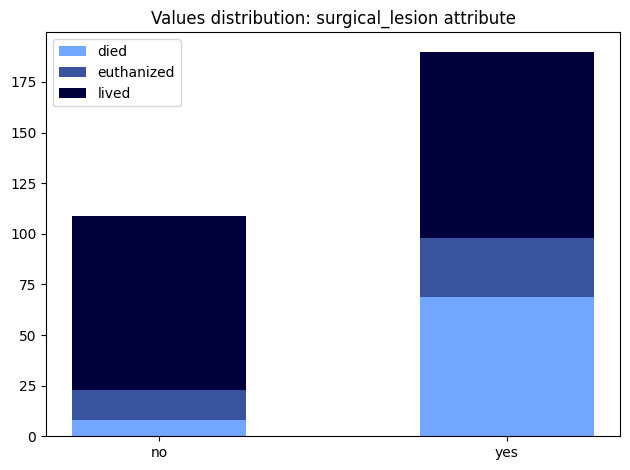

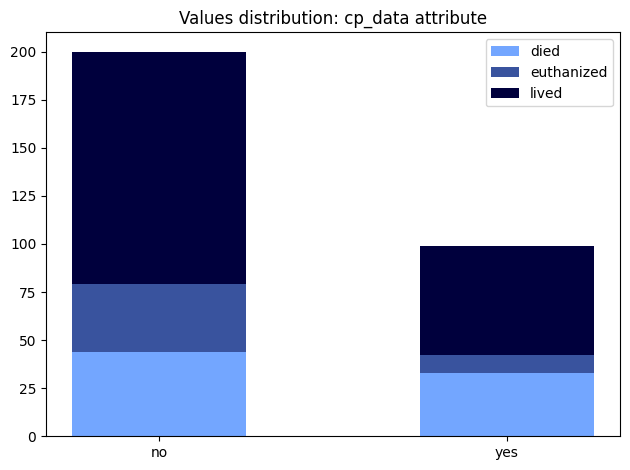

In [9]:
for attr in categorical_attrs:
    utils.plot_hist_stacked(
        data=dataset[attr],
        outcome=dataset['outcome'],
        title=f"Values distribution: {attr} attribute",
        fig_title=f"distribution-{attr}.png"
    )

Complex attributes

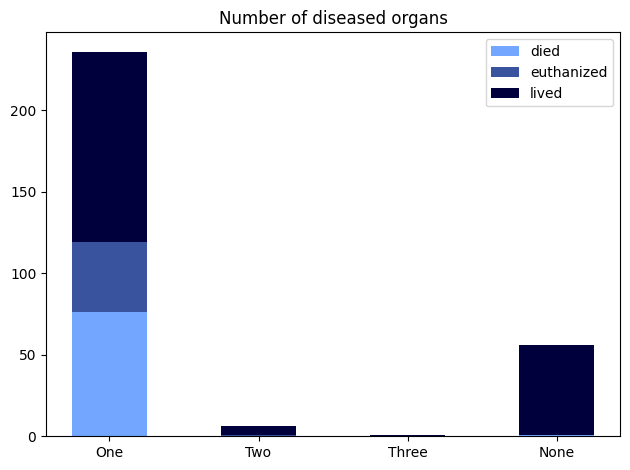

In [10]:
lesions = dataset[['lesion_1', 'lesion_2', 'lesion_3', 'outcome']].copy()
lesions["organs_count"] = "None"

one_disease = (lesions['lesion_1'] > 0) & (lesions['lesion_2'] == 0)
two_diseases = (lesions['lesion_2'] > 0) & (lesions['lesion_3'] == 0)
three_diseases = (lesions['lesion_3'] > 0)

lesions.loc[one_disease, "organs_count"] = "One"
lesions.loc[two_diseases, "organs_count"] = "Two"
lesions.loc[three_diseases, "organs_count"] = "Three"

utils.plot_hist_stacked(
    data=lesions["organs_count"],
    outcome=lesions['outcome'],
    title="Number of diseased organs",
    fig_title="distribution-complex.png",
    species=["One", "Two", "Three", "None"]
)

### Decomposition of complex attributes

In [11]:
lesion_1 = dataset.copy()[['lesion_1', 'outcome']]

lesion_site_vals = {
    '0': 'none',
    '1': 'gastric',
    '2': 'sm intestine',
    '3': 'lg colon',
    '4': 'lg colon and cecum',
    '5': 'cecum',
    '6': 'transverse colon',
    '7': 'retum/descending colon',
    '8': 'uterus',
    '9': 'bladder',
    '11': 'all intestinal sites',
}
lesion_type_vals = {
    '1': 'simple',
    '2': 'strangulation',
    '3': 'inflammation',
    '4': 'other'
}
lesion_subtype_vals = {
    '0': 'not applicable',
    '1': 'mechanical',
    '2': 'paralytic',
}
lesion_code_vals = {
    '0': 'not applicable',
    '1': 'obturation',
    '2': 'intrinsic',
    '3': 'extrinsic',
    '4': 'adynamic',
    '5': 'volvulus/torsion',
    '6': 'intussuption',
    '7': 'thromboembolic',
    '8': 'hernia',
    '9': 'lipoma/slenic incarceration',
    '10': 'displacement',
}

lesion_site, lesion_type, lesion_subtype, lesion_code = [], [], [], []
for value in lesion_1['lesion_1']:
    value = str(value)
    try:
        if len(value) == 4:
            a, b, c, d = lesion_site_vals[value[0]], lesion_type_vals[value[1]], lesion_subtype_vals[value[2]], lesion_code_vals[value[3]]
            
            lesion_site.append(a)
            lesion_type.append(b)
            lesion_subtype.append(c)
            lesion_code.append(d)
        elif len(value) == 5:
            if value[:2] in lesion_site_vals:
                a, b, c, d = lesion_site_vals[value[:2]], lesion_type_vals[value[2]], lesion_subtype_vals[value[3]], lesion_code_vals[value[4]]
            
                lesion_site.append(a)
                lesion_type.append(b)
                lesion_subtype.append(c)
                lesion_code.append(d)
            else:
                a, b, c, d = lesion_site_vals[value[0]], lesion_type_vals[value[1]], lesion_subtype_vals[value[2]], lesion_code_vals[value[3:]]
            
                lesion_site.append(a)
                lesion_type.append(b)
                lesion_subtype.append(c)
                lesion_code.append(d)
        else:
            if value != '0':
                print(f"Found improper value: {value}")
                lesion_site.append(np.nan)
                lesion_type.append(np.nan)
                lesion_subtype.append(np.nan)
                lesion_code.append(np.nan)
            else:
                lesion_site.append('no lesion')
                lesion_type.append('no lesion')
                lesion_subtype.append('no lesion')
                lesion_code.append('no lesion')
    except Exception as exc:
        print(f"Key in dict was not found: {exc} for complex attribute value: {value}")

        lesion_site.append(np.nan)
        lesion_type.append(np.nan)
        lesion_subtype.append(np.nan)
        lesion_code.append(np.nan)

lesion_1['lesion_site'] = lesion_site
lesion_1['lesion_type'] = lesion_type
lesion_1['lesion_subtype'] = lesion_subtype
lesion_1['lesion_code'] = lesion_code

lesion_1

Key in dict was not found: '0' for complex attribute value: 3025
Found improper value: 400
Key in dict was not found: '0' for complex attribute value: 5000
Found improper value: 400
Key in dict was not found: '0' for complex attribute value: 3025
Found improper value: 400
Key in dict was not found: '3' for complex attribute value: 3133
Found improper value: 300
Key in dict was not found: '0' for complex attribute value: 9000
Found improper value: 400
Found improper value: 400
Key in dict was not found: '08' for complex attribute value: 12208


,lesion_1,outcome,lesion_site,lesion_type,lesion_subtype,lesion_code
0,11300,died,all intestinal sites,inflammation,not applicable,not applicable
1,2208,euthanized,sm intestine,strangulation,not applicable,hernia
2,0,lived,no lesion,no lesion,no lesion,no lesion
3,2208,died,sm intestine,strangulation,not applicable,hernia
4,4300,died,lg colon and cecum,inflammation,not applicable,not applicable
...,...,...,...,...,...,...
294,3205,euthanized,lg colon,strangulation,not applicable,volvulus/torsion
295,2208,euthanized,sm intestine,strangulation,not applicable,hernia
296,3205,died,lg colon,strangulation,not applicable,volvulus/torsion
297,2208,lived,sm intestine,strangulation,not applicable,hernia


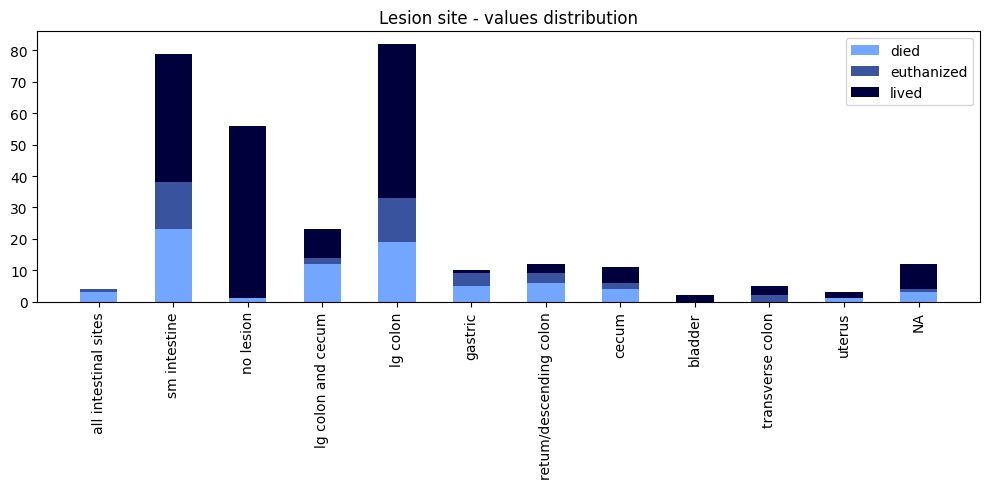

In [12]:
utils.plot_hist_stacked(
    data=lesion_1['lesion_site'],
    outcome=lesion_1['outcome'],
    title="Lesion site - values distribution",
    fig_title="distribution-lesion-site.png",
    figsize=(10, 5)
)

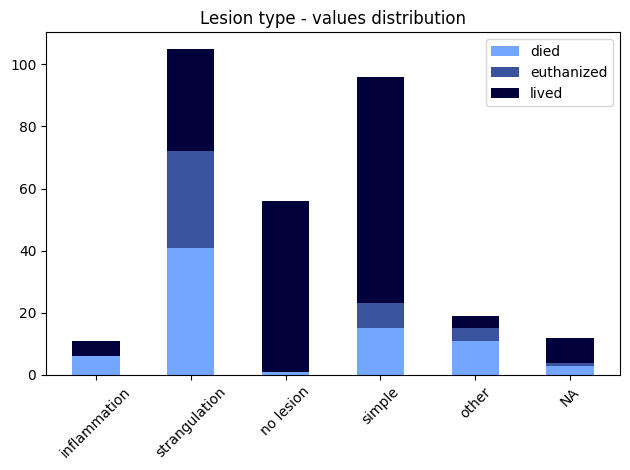

In [13]:
utils.plot_hist_stacked(
    data=lesion_1['lesion_type'],
    outcome=lesion_1['outcome'],
    title="Lesion type - values distribution",
    fig_title="distribution-lesion-type.png",
)

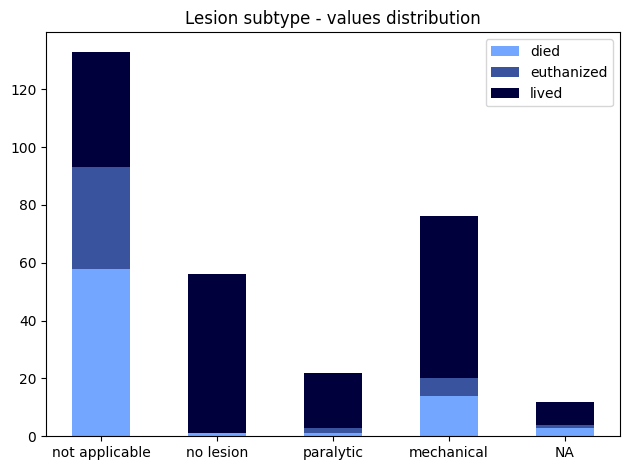

In [14]:
utils.plot_hist_stacked(
    data=lesion_1['lesion_subtype'],
    outcome=lesion_1['outcome'],
    title="Lesion subtype - values distribution",
    fig_title="distribution-lesion-subtype.png"
)

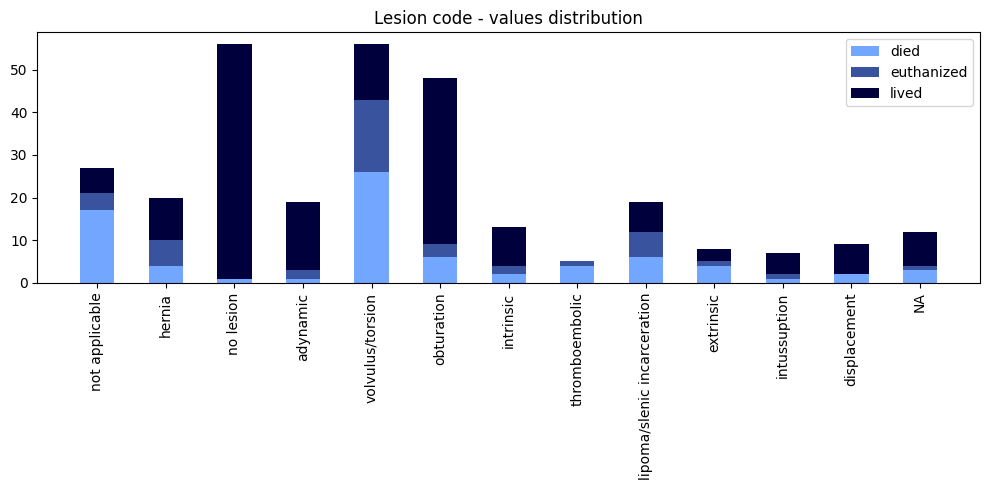

In [15]:
utils.plot_hist_stacked(
    data=lesion_1['lesion_code'],
    outcome=lesion_1['outcome'],
    title="Lesion code - values distribution",
    fig_title="distribution-lesion-code.png",
    figsize=(10, 5)
)

### Missing data - how many cases on each attribute

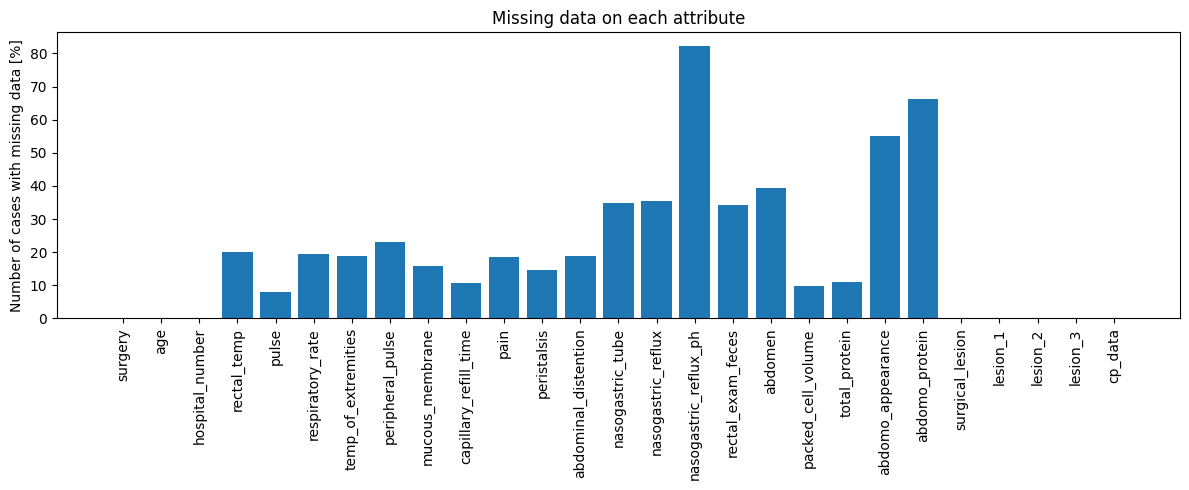

In [16]:
plt.figure(figsize=(12, 5))
plt.bar(dataset.drop('outcome', axis='columns').columns, dataset.drop('outcome', axis='columns').isna().sum() / len(dataset) * 100)
plt.xticks(rotation='vertical')
plt.ylabel("Number of cases with missing data [%]")
plt.title("Missing data on each attribute")

plt.tight_layout()
plt.savefig(os.path.join(utils.PLOTS_DIR, "NANs.png"))
plt.show()

### Attributes and cases removing

Cases with at least 13 missing values was removed from training dataset.

Removed attributes:
- identifying attribute (`hospital_number`)
- `cp_data`, since it doesn't introduce any useful information in predicting the outcome
- those with at least 80 missing values
- complex attributes, cause they're difficult to deal with, since decomposition produces NaNs values, and some components have values "not applicable", which introduce little information into the solution 

In [17]:
nans_columns = dataset.isna().sum()
nans_columns_to_remove = nans_columns[nans_columns >= 80]

nans_cases_to_remove = dataset.isna().sum(axis=1)
nans_cases_to_remove = nans_cases_to_remove[nans_cases_to_remove >= 13]

print(f"Removed casees: {nans_cases_to_remove.count()}")
print(f"Removed attributes because of NaNs:\n{nans_columns_to_remove}")

attrs_to_remove = ['cp_data', *complex_attrs, 'hospital_number', *nans_columns_to_remove.index]

print(f"Total removed attributes: {len(attrs_to_remove)}")


dataset = dataset.drop(attrs_to_remove, axis='columns')
dataset_test = dataset_test.drop(attrs_to_remove, axis='columns')

dataset = dataset.drop(nans_cases_to_remove.index)

assert list(dataset_test.columns) == list(dataset.columns)
dataset

Removed casees: 24
Removed attributes because of NaNs:
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
abdomo_appearance        165
abdomo_protein           198
dtype: int64
Total removed attributes: 12


,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,outcome,surgical_lesion
0,no,adult,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,45.0,8.4,died,no
1,yes,adult,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,50.0,85.0,euthanized,no
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,33.0,6.7,lived,no
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,48.0,7.2,died,yes
4,no,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,74.0,7.4,died,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,55.0,65.0,euthanized,no
295,no,adult,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,44.0,NaN,euthanized,yes
296,yes,adult,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,60.0,6.8,died,yes
297,yes,adult,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,50.0,6.0,lived,yes


In [18]:
numerical_attrs = [el for el in dataset.columns if el in dataset.columns and el in numerical_attrs]
categorical_attrs = [el for el in dataset.columns if el in dataset.columns and el in categorical_attrs]

### Correlation

Continuous with continuous - Pearson coefficient

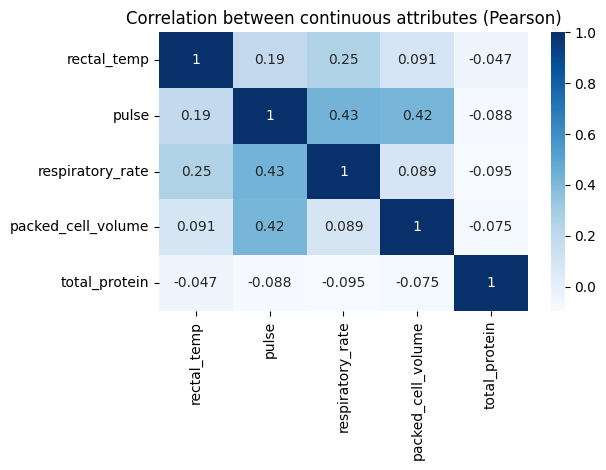

In [19]:
plt.title("Correlation between continuous attributes (Pearson)")
sns.heatmap(dataset[numerical_attrs].corr(), annot=True, cmap='Blues')
plt.tight_layout()
plt.savefig(os.path.join(utils.PLOTS_DIR, "corr-linear.png"))
plt.show()

Categorical with categorical - V Cramér coefficient

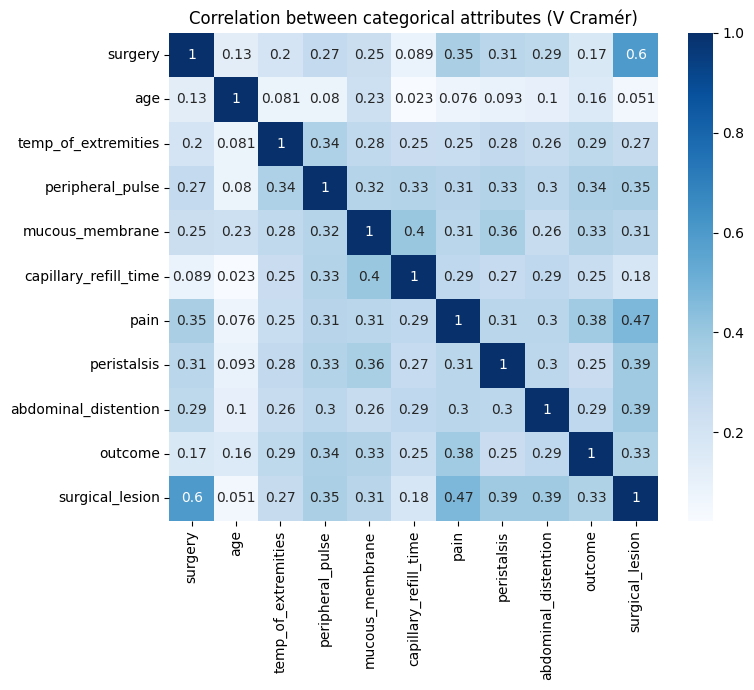

In [20]:
from scipy.stats.contingency import association

cramers = pd.DataFrame(
    np.zeros(shape=(len(categorical_attrs), len(categorical_attrs)), dtype=int),
    index=categorical_attrs, columns=categorical_attrs
)

for a in cramers.columns:
    for b in cramers.index:
        # Przekształć dane na macierz przestawieniową
        crosstab = pd.crosstab(dataset[a], dataset[b])

        # Oblicz współczynnik V Craméra
        cramers.loc[b, a] = association(crosstab)

plt.figure(figsize=(8, 7))
sns.heatmap(cramers, annot=True, cmap='Blues')
plt.title("Correlation between categorical attributes (V Cramér)")
plt.tight_layout()
plt.savefig(os.path.join(utils.PLOTS_DIR, "corr-categorical.png"))
plt.show()

### Transformations

In [21]:
transformers_all = {}

OneHotEncoder - for categorical attributes, which cannot be presented on an ordinal scale

In [22]:
from sklearn import preprocessing

to_one_hot = dict(
    surgery=['yes', 'no'], 
    pain=['severe_pain', 'alert', 'mild_pain', 'depressed', 'extreme_pain'],
    surgical_lesion=['yes', 'no']
)
for name, data_vals in to_one_hot.items():
    model = preprocessing.OneHotEncoder(
        handle_unknown='ignore',
        categories=[data_vals]
    )

    new_vals = model.fit_transform(dataset[[name]]).toarray()
    new_vals_test = model.transform(dataset_test[[name]]).toarray()

    for i, val in enumerate(data_vals):
        dataset[f"{name}_{val}"] = new_vals[:, i]
        dataset_test[f"{name}_{val}"] = new_vals_test[:, i]
    
    transformers_all[name] = model
    

dataset = dataset.drop(to_one_hot, axis='columns')
dataset_test = dataset_test.drop(to_one_hot, axis='columns')

assert list(dataset.columns) == list(dataset_test.columns)

dataset

,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,peristalsis,abdominal_distention,packed_cell_volume,total_protein,outcome,surgery_yes,surgery_no,pain_severe_pain,pain_alert,pain_mild_pain,pain_depressed,pain_extreme_pain,surgical_lesion_yes,surgical_lesion_no
0,adult,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,absent,severe,45.0,8.4,died,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,adult,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,absent,slight,50.0,85.0,euthanized,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,hypomotile,none,33.0,6.7,lived,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,absent,severe,48.0,7.2,died,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,74.0,7.4,died,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,adult,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,absent,NaN,55.0,65.0,euthanized,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
295,adult,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,hypomotile,moderate,44.0,NaN,euthanized,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
296,adult,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,absent,moderate,60.0,6.8,died,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
297,adult,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,hypomotile,moderate,50.0,6.0,lived,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Transformation of categorical attributes, which can be presented on the ordinal scale.

In [23]:
age = ['young', 'adult']
temp_of_extremities = ['cold', 'cool', 'normal', 'warm']
peripheral_pulse = ['absent', 'reduced', 'normal', 'increased']
mucous_membrane = ['dark_cyanotic', 'pale_cyanotic', 'pale_pink', 'normal_pink', 'bright_pink', 'bright_red']
capillary_refill_time = ['less_3_sec', '3', 'more_3_sec']
peristalsis = ['absent', 'hypomotile', 'normal', 'hypermotile']
abdominal_distention = ['none', 'slight', 'moderate', 'severe']

to_change = dict(
    age=age,
    temp_of_extremities=temp_of_extremities,
    peripheral_pulse=peripheral_pulse,
    mucous_membrane=mucous_membrane,
    capillary_refill_time=capillary_refill_time,
    peristalsis=peristalsis,
    abdominal_distention=abdominal_distention
)

for name, val_set in to_change.items():
    model = preprocessing.OrdinalEncoder(
        categories=[val_set],
        handle_unknown='use_encoded_value',
        unknown_value=np.nan
    )

    dataset[name] = model.fit_transform(np.array(dataset[name]).reshape(-1, 1)).reshape(-1, 1)
    dataset_test[name] = model.transform(np.array(dataset_test[name]).reshape(-1, 1)).reshape(-1, 1)
    
    transformers_all[name] = model

KNNImputer for missing data

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn import impute

data = dataset.drop('outcome', axis='columns')
data_test = dataset_test.drop('outcome', axis='columns')

imputer_iterative = impute.KNNImputer(weights='distance')

data = pd.DataFrame(imputer_iterative.fit_transform(data, dataset['outcome']), index=data.index, columns=data.columns)

data_test = pd.DataFrame(imputer_iterative.transform(data_test), index=data_test.index, columns=data_test.columns)

assert list(data.columns) == list(data_test.columns)
data

,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,peristalsis,abdominal_distention,packed_cell_volume,total_protein,surgery_yes,surgery_no,pain_severe_pain,pain_alert,pain_mild_pain,pain_depressed,pain_extreme_pain,surgical_lesion_yes,surgical_lesion_no
0,1.0,38.500000,66.0,28.0,1.000000,1.000000,1.746055,2.0,0.000000,3.000000,45.0,8.400000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,39.200000,88.0,20.0,2.192685,1.558951,1.000000,0.0,0.000000,1.000000,50.0,85.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,38.300000,40.0,24.0,2.000000,2.000000,2.000000,0.0,1.000000,0.000000,33.0,6.700000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,39.100000,164.0,84.0,0.000000,2.000000,0.000000,2.0,0.000000,3.000000,48.0,7.200000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,37.300000,104.0,35.0,1.236638,1.242630,0.000000,2.0,0.493984,1.760102,74.0,7.400000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,38.484741,120.0,70.0,0.000000,1.010596,1.000000,2.0,0.000000,1.986602,55.0,65.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
295,1.0,37.200000,72.0,24.0,1.000000,3.000000,1.000000,2.0,1.000000,2.000000,44.0,6.587689,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
296,1.0,37.500000,72.0,30.0,0.000000,1.000000,1.000000,0.0,0.000000,2.000000,60.0,6.800000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
297,1.0,36.500000,100.0,24.0,1.000000,1.000000,2.000000,0.0,1.000000,2.000000,50.0,6.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Some tests

In [25]:
data_np, outcome_np = data.to_numpy(), dataset['outcome'].to_numpy()
data_np_test, outcome_np_test = data_test.to_numpy(), dataset_test['outcome'].to_numpy()

assert data_np.shape[1] == data_np_test.shape[1]
assert 'outcome' not in data.columns

#### Predictions with SVM

In [26]:
from sklearn import model_selection, ensemble, tree, svm, pipeline, preprocessing
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from imblearn.metrics import geometric_mean_score

grid_svc = model_selection.GridSearchCV(
    estimator=svm.SVC(),
    param_grid=dict(
        kernel=['rbf', 'linear', 'poly'],
        degree=[1, 3, 5],
        class_weight=[None, 'balanced']
    ),
    scoring={
        "Accuracy": make_scorer(accuracy_score), "G-mean": make_scorer(geometric_mean_score), "F1-score": make_scorer(f1_score, average='weighted')
    },
    refit="F1-score"
)

scaler_svc = preprocessing.StandardScaler()
data_svc = data.copy()
data_svc[numerical_attrs] = scaler_svc.fit_transform(data_svc[numerical_attrs])

grid_svc.fit(data_svc, outcome_np)
grid_svc.best_score_, grid_svc.best_params_

(0.7061537787977976, {'class_weight': None, 'degree': 1, 'kernel': 'linear'})

#### Voting with decision tree, KNN and MLP

In [27]:
from sklearn import model_selection, ensemble, tree, svm, neighbors, neural_network
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from imblearn.metrics import geometric_mean_score

voting_pipeline = pipeline.Pipeline([
    ('voting', ensemble.VotingClassifier(
        n_jobs=4, estimators=[
            ('dtc', tree.DecisionTreeClassifier(random_state=2023)),
            ('knn', neighbors.KNeighborsClassifier()),
            ('nn', neural_network.MLPClassifier(random_state=2023))
        ]
    )),
])

grid_voting = model_selection.GridSearchCV(
    estimator=voting_pipeline,
    param_grid=dict(
        voting__voting=['hard', 'soft'],
        voting__dtc__max_depth=[1, 2, 5, 10],
        voting__knn__weights=['uniform', 'distance'],
        voting__knn__n_neighbors=[3, 5, 10],
        voting__nn__shuffle=[True, False],
        voting__nn__max_iter=[200, 500, 1000],
    ),
    scoring={
        "Accuracy": make_scorer(accuracy_score), "G-mean": make_scorer(geometric_mean_score), "F1-score": make_scorer(f1_score, average='weighted')
    },
    refit="F1-score",
    return_train_score=True
)

scaler_voting = preprocessing.StandardScaler()
data_voting = data.copy()
data_voting[numerical_attrs] = scaler_voting.fit_transform(data_voting[numerical_attrs])

grid_voting.fit(data_voting, outcome_np)
grid_voting.best_score_, grid_voting.best_params_

(0.7168258311161084,
 {'voting__dtc__max_depth': 2,
  'voting__knn__n_neighbors': 3,
  'voting__knn__weights': 'distance',
  'voting__nn__max_iter': 200,
  'voting__nn__shuffle': False,
  'voting__voting': 'soft'})

#### Good old Random Forest

In [28]:
from sklearn import model_selection, ensemble, tree, svm
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from imblearn.metrics import geometric_mean_score

grid_random_forest = model_selection.GridSearchCV(
    estimator=ensemble.RandomForestClassifier(n_jobs=4, random_state=2023),
    param_grid=dict(
        max_depth=[None, 1, 2, 5],
        class_weight=[None, 'balanced', 'balanced_subsample'],
        min_samples_split=[2, 5, 10],
        min_samples_leaf=[1, 2, 5]
    ),
    scoring={
        "Accuracy": make_scorer(accuracy_score), "G-mean": make_scorer(geometric_mean_score), "F1-score": make_scorer(f1_score, average='weighted')
    },
    refit="F1-score"
)

grid_random_forest.fit(data_np, outcome_np)
grid_random_forest.best_params_, grid_random_forest.best_score_

({'class_weight': 'balanced',
  'max_depth': None,
  'min_samples_leaf': 2,
  'min_samples_split': 10},
 0.7047615620071197)

Best scores

In [29]:
grid_svc.best_score_, grid_random_forest.best_score_, grid_voting.best_score_

(0.7061537787977976, 0.7047615620071197, 0.7168258311161084)

In [30]:
grid_svc.best_params_, grid_random_forest.best_params_, grid_voting.best_params_

({'class_weight': None, 'degree': 1, 'kernel': 'linear'},
 {'class_weight': 'balanced',
  'max_depth': None,
  'min_samples_leaf': 2,
  'min_samples_split': 10},
 {'voting__dtc__max_depth': 2,
  'voting__knn__n_neighbors': 3,
  'voting__knn__weights': 'distance',
  'voting__nn__max_iter': 200,
  'voting__nn__shuffle': False,
  'voting__voting': 'soft'})

### Plots of the results

Attributes importance, based on the random forest

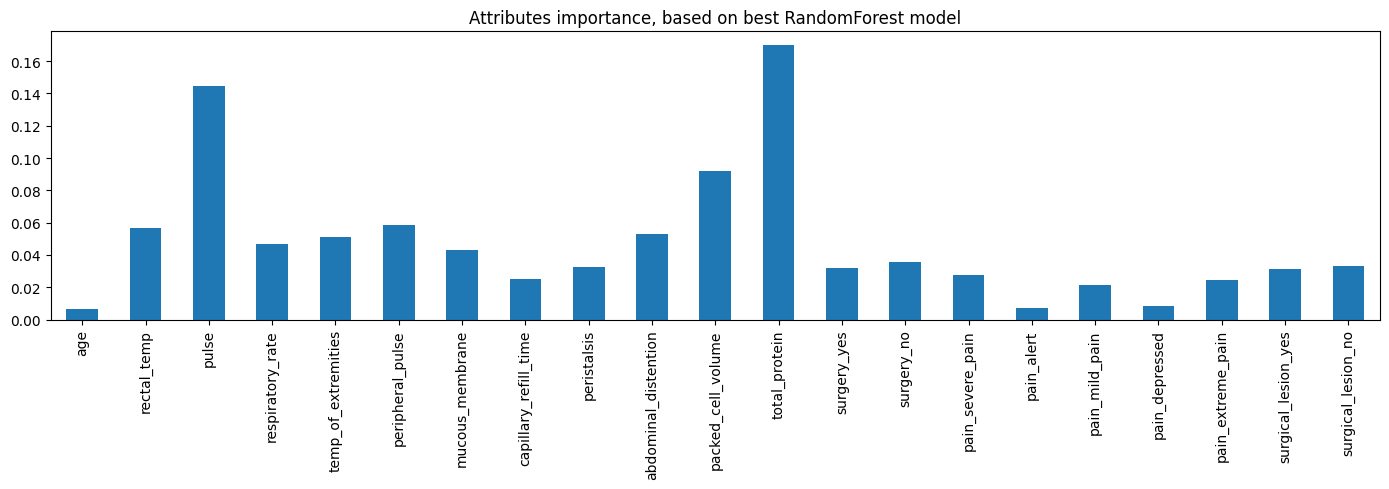

In [31]:
fig, ax = plt.subplots(figsize=(14, 5))
plt.title("Attributes importance, based on best RandomForest model")
pd.Series(grid_random_forest.best_estimator_.feature_importances_, index=data.columns).plot.bar(ax=ax)
plt.tight_layout()
plt.savefig(os.path.join(utils.PLOTS_DIR, "results-importance.png"))
plt.show()

Metrics

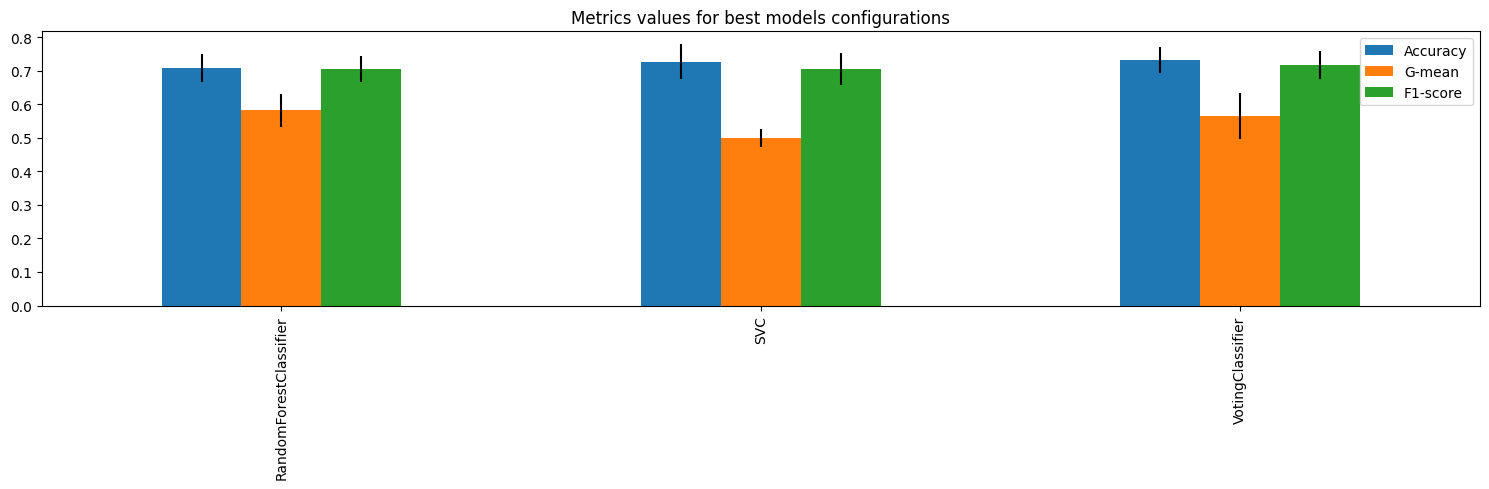

In [32]:
grids = [grid_random_forest.cv_results_, grid_svc.cv_results_, grid_voting.cv_results_]
grid_idx = [grid_random_forest.best_index_, grid_svc.best_index_, grid_voting.best_index_]
grid_data = [pd.DataFrame(g).loc[i] for g, i in zip(grids, grid_idx)]


err = pd.DataFrame([
    [uwu['std_test_Accuracy'] for uwu in grid_data],
    [uwu['std_test_G-mean'] for uwu in grid_data],
    [uwu['std_test_F1-score'] for uwu in grid_data],
], index=["Accuracy", "G-mean", "F1-score"], columns=["RandomForestClassifier", "SVC", "VotingClassifier"]).transpose()

fig, ax = plt.subplots(figsize=(15, 5))
pd.DataFrame([
    [uwu['mean_test_Accuracy'] for uwu in grid_data],
    [uwu['mean_test_G-mean'] for uwu in grid_data],
    [uwu['mean_test_F1-score'] for uwu in grid_data],
], index=["Accuracy", "G-mean", "F1-score"], columns=["RandomForestClassifier", "SVC", "VotingClassifier"]).transpose().plot.bar(ax=ax, yerr=err)
plt.title("Metrics values for best models configurations")
plt.tight_layout()
plt.savefig(os.path.join(utils.PLOTS_DIR, "results-metrics-best.png"))

Confusion matrices

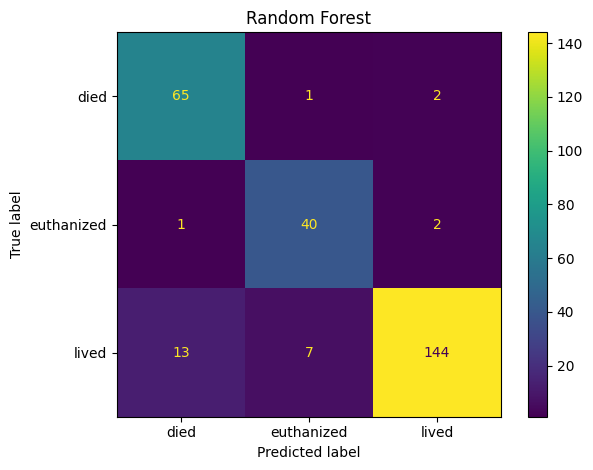

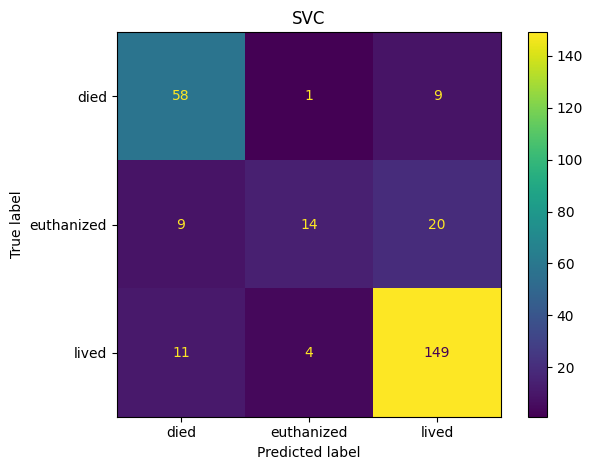

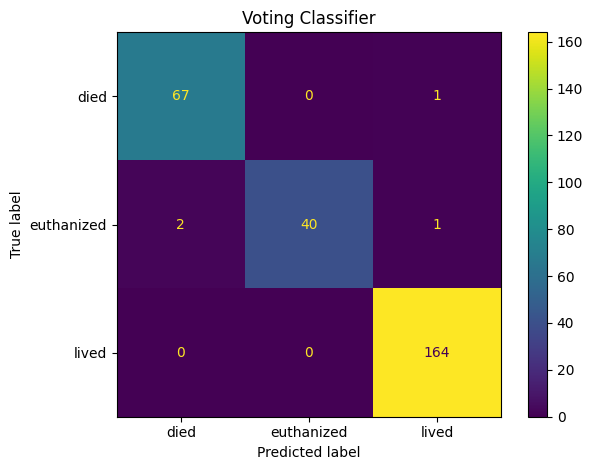

In [34]:
from sklearn import metrics

titles = ["Random Forest", "SVC", "Voting Classifier"]
estimators = [grid_random_forest.best_estimator_, grid_svc.best_estimator_, grid_voting.best_estimator_]

for title, estimator in zip(titles, estimators):
    data_test_svc, data_test_voting = data.copy(), data.copy()
    
    data_test_svc[numerical_attrs] = scaler_svc.transform(data_test_svc[numerical_attrs])
    data_test_voting[numerical_attrs] = scaler_voting.transform(data_test_voting[numerical_attrs])

    if title == 'SVC':
        predicted = estimator.predict(data_test_svc)
    elif title == 'Voting Classifier':
        predicted = estimator.predict(data_test_voting)
    else:
        predicted = estimator.predict(data_np)

    cm = metrics.confusion_matrix(outcome_np, predicted)
    disp = metrics.ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=estimator.classes_
    )
    disp.plot()
    plt.title(title)
    plt.grid(visible=False)
    plt.tight_layout()
    plt.savefig(os.path.join(utils.PLOTS_DIR, f"heatmap-{title}-x.png"))
    plt.show()   

### Confusion matrices - test set

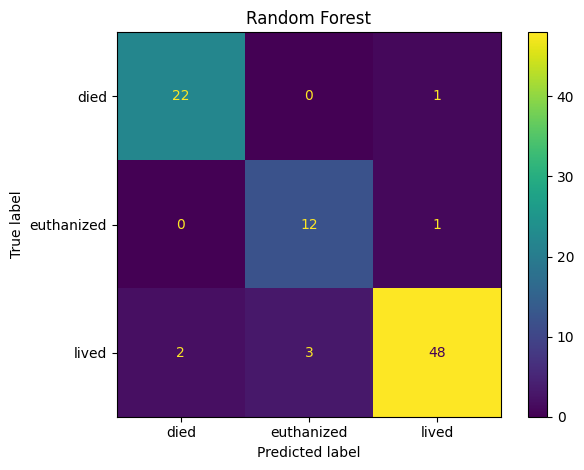

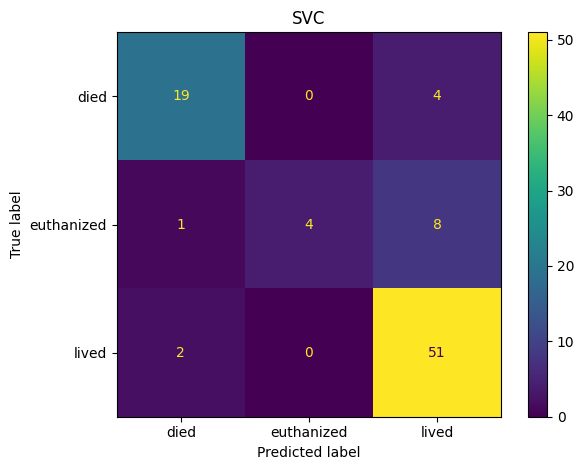

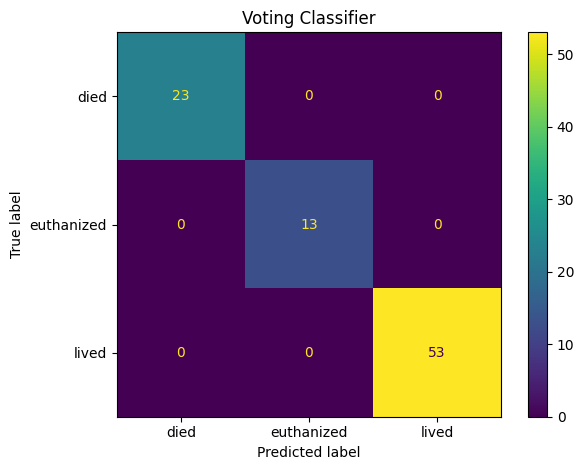

In [36]:
# macierze pomyłek dla zbioru testowego
from sklearn import metrics

titles = ["Random Forest", "SVC", "Voting Classifier"]
estimators = [grid_random_forest.best_estimator_, grid_svc.best_estimator_, grid_voting.best_estimator_]

for title, estimator in zip(titles, estimators):
    data_test_svc, data_test_voting = data_test.copy(), data_test.copy()
    
    data_test_svc[numerical_attrs] = scaler_svc.transform(data_test_svc[numerical_attrs])
    data_test_voting[numerical_attrs] = scaler_voting.transform(data_test_voting[numerical_attrs])

    if title == 'SVC':
        predicted = estimator.predict(data_test_svc)
    elif title == 'Voting Classifier':
        predicted = estimator.predict(data_test_voting)
    else:
        predicted = estimator.predict(data_np_test)

    cm = metrics.confusion_matrix(outcome_np_test, predicted)
    disp = metrics.ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=estimator.classes_
    )
    disp.plot()
    plt.title(title)
    plt.grid(visible=False)
    plt.tight_layout()
    plt.savefig(os.path.join(utils.PLOTS_DIR, f"heatmap-{title}.png"))
    plt.show()   

In [44]:
from joblib import dump

titles = ["Random Forest", "SVC", "Voting Classifier"]
estimators = [grid_random_forest.best_estimator_, grid_svc.best_estimator_, grid_voting.best_estimator_]

for title, estimator in zip(titles, estimators):
    dump(estimator, f"./models/{title.replace(' ', '_')}") 